In [1]:
from scipy.interpolate import interp1d
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.table import Table
import astropy.io.fits as fits
import numpy as np

# Savage & Wakker 2009's best fit SiIV flat slab model
lgnh = 13.36
lgnh_err = [0.09, -0.08]
h = 3.2
h_err = [1.0, -0.6]

The data-model offset

In [2]:
qtb = Table.read('tables/Zheng18_Table1.fits', format='fits')
# Q=0 sightlines are resolved, Q=1 are saturated 
ind0 = qtb['Q']==0
qtb_res = qtb[ind0]

my_b = qtb_res['Glat']
my_l = qtb_res['Glon']

my_N = (qtb_res['N_1393']+qtb_res['N_1402'])/2.
my_Ne = np.sqrt(qtb_res['Nsig_1393']**2 + qtb_res['Nsig_1402']**2)/2

my_logN = np.log10(my_N)
my_logNe = my_Ne/my_N/np.log(10)

In [3]:
# saturate sightline 
ind1 = qtb['Q']==1
qtb_sat = qtb[ind1]

my_b_low = qtb_sat['Glat']
my_l_low = qtb_sat['Glon']

my_N_low = qtb_sat['N_1402']
my_Ne_low = qtb_sat['N_1402']

my_logN_low = np.log10(my_N_low)
my_logNe_low = my_Ne_low/my_N_low/np.log(10)

In [4]:
inind = np.any([my_l>270, my_l<90], axis=0)
outind = np.all([my_l>=90, my_l<=270], axis=0)
x1 = my_b[inind]
y1 = my_logN[inind]
ye1 = my_logNe[inind]
yoff1 = y1 - np.log10((10**lgnh)/np.fabs(np.sin(np.radians(x1))))

x2 = my_b[outind]
y2 = my_logN[outind]
ye2 = my_logNe[outind]
yoff2 = y2 - np.log10((10**lgnh)/np.fabs(np.sin(np.radians(x2))))

# lower limit 
inind = np.any([my_l_low>270, my_l_low<90], axis=0)
outind = np.all([my_l_low>=90, my_l_low<=270], axis=0)
x1_low = my_b_low[inind]
y1_low = my_logN_low[inind]
ye1_low = my_logNe_low[inind]
yoff1_low = y1_low - np.log10((10**lgnh)/np.fabs(np.sin(np.radians(x1_low))))

x2_low = my_b_low[outind]
y2_low = my_logN_low[outind]
ye2_low = my_logNe_low[outind]
yoff2_low = y2_low - np.log10((10**lgnh)/np.fabs(np.sin(np.radians(x2_low))))

In [5]:
## flat slab model 
x5 = np.mgrid[15:91:5]  ## b
y5 = np.log10((10**lgnh)/np.sin(np.radians(x5)))
y5_up = np.log10((10**lgnh)*(1+lgnh_err[0]*np.log(10))/np.sin(np.radians(x5)))
y5_low = np.log10((10**lgnh)*(1+lgnh_err[1]*np.log(10))/np.sin(np.radians(x5)))

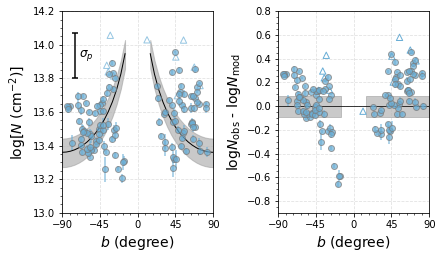

In [6]:
fig = plt.figure(figsize=(6, 3.5))

ax1 = fig.add_axes([0.12, 0.15, 0.35, 0.8])
ax2 = fig.add_axes([0.62, 0.15, 0.35, 0.8])
ax1.grid(linestyle='--', color=plt.cm.Greys(0.3), alpha=0.4)
ax2.grid(linestyle='--', color=plt.cm.Greys(0.3), alpha=0.4)

rr = plt.cm.Reds(0.5)
bb = plt.cm.Blues(0.5)
ms = 6
al = 0.7

ax1.plot(x5, y5, color='k', lw=1)
ax1.plot(-x5, y5, color='k', lw=1)
ax1.fill_between(x5, y5_up, y5_low, color=plt.cm.Greys(0.5), alpha=0.5, edgecolor='none')
ax1.fill_between(-x5, y5_up, y5_low, color=plt.cm.Greys(0.5), alpha=0.5, edgecolor='none')
ax1.errorbar(x1, y1, yerr=ye1, markersize=ms, marker='o', linestyle='none', alpha=al, color=bb, 
             markeredgecolor=plt.cm.Greys(0.6))
ax1.errorbar(x2, y2, yerr=ye2, markersize=ms, marker='o', linestyle='none', alpha=al, color=bb, 
            markeredgecolor=plt.cm.Greys(0.6))
ax1.scatter(x1_low, y1_low, marker='^', s=40, alpha=0.7, edgecolor=bb, facecolor='none')
ax1.scatter(x2_low, y2_low, marker='^', s=40, alpha=0.7, edgecolor=bb, facecolor='none')
ax1.set_ylim(13., 14.2)
ax1.vlines(-75, 13.8, 13.8+0.27)
ax1.hlines(13.8, -75-3, -75+4)
ax1.hlines(13.8+0.27, -75-3, -75+4)
ax1.text(-70, 13.8+0.13, r'$\sigma_p$', fontsize=12)


ax2.hlines(0, -90, 90, lw=0.75)
ax2.fill_between(x5, y5_up-y5, y5_low-y5, color=plt.cm.Greys(0.5), alpha=0.5, edgecolor='none')
ax2.fill_between(-x5, y5_up-y5, y5_low-y5, color=plt.cm.Greys(0.5), alpha=0.5, edgecolor='none')
ax2.errorbar(x1, yoff1, yerr=ye1, markersize=ms, marker='o', linestyle='none', alpha=al, color=bb,
             markeredgecolor=plt.cm.Greys(0.6))
ax2.errorbar(x2, yoff2, yerr=ye2, markersize=ms, marker='o', linestyle='none', alpha=al, color=bb, 
             markeredgecolor=plt.cm.Greys(0.6))
ax2.scatter(x1_low, yoff1_low, marker='^', s=40, edgecolor=bb, facecolor='none')
ax2.scatter(x2_low, yoff2_low, marker='^', s=40, edgecolor=bb, facecolor='none')
ax2.set_ylim(-0.9, 0.8)
for ax in [ax1, ax2]:
    ax.set_xlim(-90, 90)
    ax.set_xlabel(r'$b$ (degree)', fontsize=14)
    ax.set_xticks([-90, -45, 0, 45, 90])
    ax.minorticks_on()
    ax.grid(linestyle='--', color=plt.cm.Greys(0.4))
    
#ax1.text(-80, 14.02, 'Flat Slab: lgN=lgN_DH/sinb', fontsize=8)
ax1.set_ylabel(r'log[$N$ (cm$^{-2}$)]', fontsize=14)
ax2.set_ylabel(r'log$N_{\rm obs}$ - log$N_{\rm mod}$', fontsize=14)
plt.savefig('figs/fig7_nocolor.pdf')

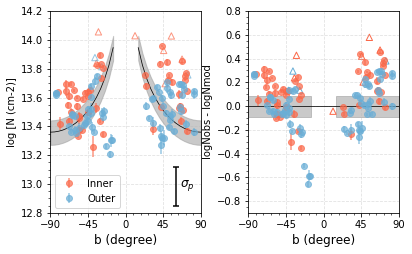

In [7]:
fig = plt.figure(figsize=(5.5, 3.5))

ax1 = fig.add_axes([0.10, 0.15, 0.38, 0.8])
ax2 = fig.add_axes([0.60, 0.15, 0.38, 0.8])
ax1.grid(linestyle='--', color=plt.cm.Greys(0.3), alpha=0.4)
ax2.grid(linestyle='--', color=plt.cm.Greys(0.3), alpha=0.4)

rr = plt.cm.Reds(0.5)
bb = plt.cm.Blues(0.5)
ms = 6
al = 0.7

ax1.plot(x5, y5, color='k', lw=0.75)
ax1.plot(-x5, y5, color='k', lw=0.75)
ax1.fill_between(x5, y5_up, y5_low, color=plt.cm.Greys(0.5), alpha=0.5, edgecolor='none')
ax1.fill_between(-x5, y5_up, y5_low, color=plt.cm.Greys(0.5), alpha=0.5, edgecolor='none')
ax1.errorbar(x1, y1, yerr=ye1, markersize=ms, marker='o', linestyle='none', alpha=al, color=rr, label='Inner')
ax1.errorbar(x2, y2, yerr=ye2, markersize=ms, marker='o', linestyle='none', alpha=al, color=bb, label='Outer')
ax1.scatter(x1_low, y1_low, marker='^', s=40, alpha=0.7, edgecolor=rr, facecolor='none', label=None)
ax1.scatter(x2_low, y2_low, marker='^', s=40, alpha=0.7, edgecolor=bb, facecolor='none', label=None)
ax1.set_ylim(12.8, 14.2)
ax1.legend(loc='lower left', fontsize=10)
ax1.vlines(60, 12.85, 12.85+0.27)
ax1.hlines(12.85, 60-3, 60+4)
ax1.hlines(12.85+0.27, 60-3, 60+4)
ax1.text(65, 12.85+0.13, r'$\sigma_p$', fontsize=12)


ax2.hlines(0, -90, 90, lw=0.75)
ax2.fill_between(x5, y5_up-y5, y5_low-y5, color=plt.cm.Greys(0.5), alpha=0.5, edgecolor='none')
ax2.fill_between(-x5, y5_up-y5, y5_low-y5, color=plt.cm.Greys(0.5), alpha=0.5, edgecolor='none')
ax2.errorbar(x1, yoff1, yerr=ye1, markersize=ms, marker='o', linestyle='none', alpha=al, color=rr)
ax2.errorbar(x2, yoff2, yerr=ye2, markersize=ms, marker='o', linestyle='none', alpha=al, color=bb)
ax2.scatter(x1_low, yoff1_low, marker='^', s=40, edgecolor=rr, facecolor='none')
ax2.scatter(x2_low, yoff2_low, marker='^', s=40, edgecolor=bb, facecolor='none')
ax2.set_ylim(-0.9, 0.8)
for ax in [ax1, ax2]:
    ax.set_xlim(-90, 90)
    ax.set_xlabel('b (degree)', fontsize=12)
    ax.set_xticks([-90, -45, 0, 45, 90])
    ax.minorticks_on()
    ax.grid(linestyle='--', color=plt.cm.Greys(0.4))
    
#ax1.text(-80, 14.02, 'Flat Slab: lgN=lgN_DH/sinb', fontsize=8)
ax1.set_ylabel('log [N (cm-2)]')
ax2.set_ylabel('logNobs - logNmod')
plt.savefig('figs/fig7.pdf')

In [8]:
yoff = my_logN - np.log10((10**lgnh)/np.fabs(np.sin(np.radians(my_b))))

# run spearman rank coefficient on the south and north offset datapoint separtately
from scipy.stats import spearmanr
aa = spearmanr(my_b[my_b>=0], yoff[my_b>=0])
bb = spearmanr(np.fabs(my_b[my_b<0]),  yoff[my_b<0])
cc = spearmanr(np.fabs(my_b), yoff)
print('North: ', aa)
print('South: ', bb)
print('All:   ', cc)

North:  SpearmanrResult(correlation=0.5673957621326042, pvalue=5.117453925307547e-06)
South:  SpearmanrResult(correlation=0.5562596006144394, pvalue=2.207523070423909e-06)
All:    SpearmanrResult(correlation=0.5804657456202822, pvalue=4.53997175781636e-12)


In [9]:
projN = np.log10(my_N*np.fabs(np.sin(np.radians(my_b))))

# run spearman rank coefficient on the south and north offset datapoint separtately
from scipy.stats import spearmanr
aa = spearmanr(my_b[my_b>=0], projN[my_b>=0])
bb = spearmanr(np.fabs(my_b[my_b<0]),  projN[my_b<0])
cc = spearmanr(np.fabs(my_b), projN)
print('North: ', aa)
print('South: ', bb)
print('All:   ', cc)

North:  SpearmanrResult(correlation=0.5673957621326042, pvalue=5.117453925307547e-06)
South:  SpearmanrResult(correlation=0.5562596006144394, pvalue=2.207523070423909e-06)
All:    SpearmanrResult(correlation=0.5804657456202822, pvalue=4.53997175781636e-12)


The logNsinb - logz relation 

In [10]:
## star modeling ## 
mod_z = 10**np.mgrid[-3:2:0.1]  
mod_Nz = lgnh+np.log10(1-np.exp(-mod_z/h))

mod_Nz_up = lgnh+lgnh_err[0]+np.log10(1-np.exp(-mod_z/(h+h_err[0])))
mod_Nz_low = lgnh+lgnh_err[1]+np.log10(1-np.exp(-mod_z/(h+h_err[1])))

x5 = np.log10(mod_z)
y5 = mod_Nz
y5_up = mod_Nz_up
y5_low = mod_Nz_low

## qso modeling ## # SW09's Table 3
x6 = np.mgrid[-90:91:5]
y6 = np.zeros(x6.size)+lgnh 
y6_up = np.zeros(x6.size)+lgnh+lgnh_err[0]
y6_low = np.zeros(x6.size)+lgnh+lgnh_err[1]

In [11]:
x7 = my_b
y7 = np.log10(my_N*np.fabs(np.sin(np.radians(my_b))))
ye7 = my_logNe

x7_low = my_b_low
y7_low = np.log10(my_N_low*np.fabs(np.sin(np.radians(my_b_low))))
ye7_low = my_logNe_low

First take the SW09's stars and qsos from Wakker+2012. SW09's qsos are all in Wakker+2012. In SW09's Table 3, the SiIV column's 21 Extragalactic sources includes the 6 sightlines from LMC/SMC. <br>
02/13/2018 note: decide to only show the SW09 data; WK12 does not help in this fig. 

In [13]:
swstar = Table.read('tables/SW09_tb2.txt', format='ascii')
ind_SiIV = np.isfinite(swstar['NSiIV'])
swstar = swstar[ind_SiIV]  # use sightlines that have SiIV measurements, do not include upper/lower limit 

ind_R01 = np.any([swstar['R']==0, swstar['R']==1], axis=0)  # non X-ray, R=2/3
ind_nonHII = swstar['HII'] == '...'                         # non prominent HII regions
ind_star = swstar['d'] != 999                               # non AGN 
ind_agn = swstar['d'] == 999
ind_local = swstar['Object'] != 'vZ_1128'                 # no vZ 1128 at b>45
ind_all = np.all([ind_R01, ind_nonHII, ind_star, ind_local], axis=0)   # 41 sightline after this selection

fit_star_sample = swstar[ind_all]                      ## 
res_star_sample = swstar[np.all([ind_star, np.logical_not(ind_all)], axis=0)]

## those stars that were used to fit the scale height  ## these includes those LMC/SMC sightlines 
y1 = np.log10(10**(fit_star_sample['NSiIV'])*np.fabs(np.sin(np.radians(fit_star_sample['b'])))) # logN * sin|b|
ye1 = fit_star_sample['eNSiIV']                                 
x1 = np.log10(fit_star_sample['d']*np.fabs(np.sin(np.radians(fit_star_sample['b']))))
xe1 = fit_star_sample['ed']

## those stars that were NOT used 
y2 = np.log10(10**(res_star_sample['NSiIV'])*np.fabs(np.sin(np.radians(res_star_sample['b'])))) # logN * sin|b|
ye2 = res_star_sample['eNSiIV']
x2 = np.log10(res_star_sample['d']*np.fabs(np.sin(np.radians(res_star_sample['b']))))
xe2 = res_star_sample['ed']

In [14]:
## those qsos that were used to fit the scale height / does not include LMC/SMC sightlines 

wkqso = Table.read('tables/Wakker12_tb2_SiIV.txt', format='ascii')
fit_qso_sample = wkqso[np.all([wkqso['SW09']==1, wkqso['b']<45], axis=0)]
x3 = fit_qso_sample['b']
temp_N = np.nanmean([10**fit_qso_sample['NS'], 10**fit_qso_sample['NW']], axis=0)
y3 = np.log10(temp_N*np.fabs(np.sin(np.radians(x3)))) # logN * sin|b|

temp_Ne = np.sqrt(fit_qso_sample['NeS']**2+fit_qso_sample['NeW']**2)/2.
nanS = np.isnan(fit_qso_sample['NeS'])
temp_Ne[nanS] = fit_qso_sample['NeW'][nanS]
nanW = np.isnan(fit_qso_sample['NeW'])
temp_Ne[nanW] = fit_qso_sample['NeS'][nanW]
ye3 = temp_Ne

## those qso that were NOT used; include SW09 and WK12
#res_qso_sample = wkqso[np.logical_not(np.all([wkqso['SW09']==1, wkqso['b']<45], axis=0))]
#x4 = res_qso_sample['b']
#temp_N = np.nanmean([10**res_qso_sample['NS'], 10**res_qso_sample['NW']], axis=0)
#y4 = np.log10(temp_N*np.fabs(np.sin(np.radians(x4)))) # logN * sin|b|

#temp_Ne = np.sqrt(res_qso_sample['NeS']**2+res_qso_sample['NeW']**2)/2.
#nanS = np.isnan(res_qso_sample['NeS'])
#temp_Ne[nanS] = res_qso_sample['NeW'][nanS]
#nanW = np.isnan(res_qso_sample['NeW'])
#temp_Ne[nanW] = res_qso_sample['NeS'][nanW]
#ye4 = temp_Ne

## those qso that were NOT used; include SW09 only
res_qso_sample = wkqso[np.all([wkqso['SW09']==1, wkqso['b']>=45], axis=0)]
x4 = res_qso_sample['b']
temp_N = np.nanmean([10**res_qso_sample['NS'], 10**res_qso_sample['NW']], axis=0)
y4 = np.log10(temp_N*np.fabs(np.sin(np.radians(x4)))) # logN * sin|b|

temp_Ne = np.sqrt(res_qso_sample['NeS']**2+res_qso_sample['NeW']**2)/2.
nanS = np.isnan(res_qso_sample['NeS'])
temp_Ne[nanS] = res_qso_sample['NeW'][nanS]
nanW = np.isnan(res_qso_sample['NeW'])
temp_Ne[nanW] = res_qso_sample['NeS'][nanW]
ye4 = temp_Ne

plot demo: qso error bar is very small, comparable to the size of the symbol. 

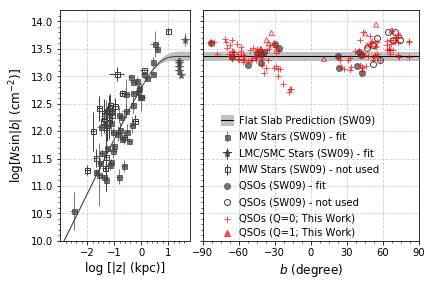

In [15]:
fig = plt.figure(figsize=(6, 4))

## the star sample 
scc = plt.cm.Greys(0.8)
ax1 = fig.add_axes([0.12, 0.13, 0.3, 0.8]) 
ax1.errorbar(x1[x1<=1.2], y1[x1<=1.2], yerr=ye1[x1<=1.2], xerr=xe1[x1<=1.2], 
             fmt='s', lw=1, markersize=5, color=scc, alpha=0.7)  # star, fit 
ax1.errorbar(x2, y2, yerr=ye2, xerr=xe2, fmt='s', lw=1, markersize=5,             # star, non-fit 
             color=scc, markerfacecolor='none')
ax1.errorbar(x1[x1>1.2], y1[x1>1.2], yerr=ye1[x1>1.2], xerr=xe1[x1>1.2], 
             fmt='*', lw=1, markersize=8, color=scc, alpha=0.7)  # LMC/SMC star, fit 
ax1.plot(x5, y5, color=plt.cm.Greys(0.8), lw=1)                                   # mod, star
ax1.fill_between(x5, y5_low, y5_up, facecolor=plt.cm.Greys(0.5), alpha=0.6, edgecolor='none')
ax1.set_xticks([-2, -1, 0, 1])
ax1.set_xlim(-3, 1.8)
ax1.set_xlabel('log [|z| (kpc)]', fontsize=12)
ax1.set_ylabel(r'log[$N$sin|$b$| (cm$^{-2}$)]', fontsize=12)

## the qso sample 
ax2 = fig.add_axes([0.45, 0.13, 0.5, 0.8])
ax2.plot(x6, y6, color='k', lw=1)                                                     # mod, qso
ax2.fill_between(x6, y6_up, y6_low, facecolor=plt.cm.Greys(0.5), alpha=0.6, edgecolor='none')
ax2.errorbar(x3, y3, fmt='o', lw=1, markersize=6, color=scc, alpha=0.7)                          # WK12, qso, fit
ax2.errorbar(x4, y4, fmt='o', lw=1, markersize=6, color=scc, markerfacecolor='none')  # WK12, qso, nonfit
ax2.errorbar(x7, y7, fmt='+', lw=1, markersize=6, color='r', alpha=0.7)               # Z17, qso   
ax2.scatter(x7_low, y7_low, marker='^', s=26, edgecolor='r', alpha=0.7, facecolor='none') # Z17, qso, saturated  
ax2.set_yticklabels([])
ax2.set_xticks(np.mgrid[-90:91:30])
ax2.set_xlim(-90, 90)
ax2.set_xlabel(r'$b$ (degree)', fontsize=12)

## labeling 
## label ## 
ax2.plot([-75, -65], [12.2, 12.2], color='k', lw=1)                                                     # mod, qso
ax2.fill_between([-75, -64], [12.3, 12.3], [12.1, 12.1], facecolor=plt.cm.Greys(0.5), alpha=0.6, edgecolor='none')
ax2.text(-60, 12.15, 'Flat Slab Prediction (SW09)')

ax2.errorbar([-70], [11.9], yerr=[0.1], fmt='s', lw=1, markersize=5, color=scc, alpha=0.7) 
ax2.text(-60, 11.85, 'MW Stars (SW09) - fit')
ax2.errorbar([-70], [11.6], yerr=[0.1], fmt='*', lw=1, markersize=8, color=scc) 
ax2.text(-60, 11.55, 'LMC/SMC Stars (SW09) - fit')
ax2.errorbar([-70], [11.3], yerr=[0.1], fmt='s', lw=1, markersize=5, color=scc, markerfacecolor='none') 
ax2.text(-60, 11.25, 'MW Stars (SW09) - not used')

ax2.errorbar([-70], [11.0], fmt='o', lw=1, markersize=6, color=scc, alpha=0.7)
ax2.text(-60, 10.95, 'QSOs (SW09) - fit')

ax2.errorbar([-70], [10.7],  fmt='o', lw=1, markersize=6, color=scc, markerfacecolor='none') # X3
ax2.text(-60, 10.65, 'QSOs (SW09) - not used')
ax2.errorbar([-70], [10.4], fmt='+', lw=1, markersize=6, color='r', alpha=0.7)
ax2.text(-60, 10.35, 'QSOs (Q=0; This Work)')
ax2.errorbar([-70], [10.15], fmt='^', lw=1, markersize=6, color='r', alpha=0.7)
ax2.text(-60, 10.1, 'QSOs (Q=1; This Work)')

for ax in [ax1, ax2]:
    ax.minorticks_on()
    ax.set_ylim(10., 14.2)
    ax.grid(linestyle='--', color=plt.cm.Greys(0.3))
fig.savefig('figs/fig6.pdf')